# Numerical Root Finding Methods
Finding the zero(s)/root(s) to a function is sometimes as easy as setting the function equal to zero and solving for x. But when solving for x becomes complex or even impossible, one can use numerical approximations to identify the roots. Several numerical root finding methods are discussed below. 

## Secant Method
### Background
A secant is a straight line that intersects a function at (at least) two points. The secant method applies a secant and then iteratively adjusts the secant line to eventually approximate the position of the root at a pre-defined level of precision. We start by applying a secant line through our function. It is important that the two points at which the secant cuts the function include the root we try to find. In other words, we must choose the two points $x_1$ and $x_2$ so that $f(x_1) < 0$ and $f(x_2) > 0$ or vice versa. 

Let's illustrate this with function $f(x) = x^3 + 2x^2 + \frac{x}{2}$. We can see that there are three roots. We will try to find the first one with the secant at $x_1=-2$ and $x_2=-1$, which satisfies that the signs for $f(x_1)$ and $f(x_2)$ are different since $f(x_1) = -1$ and $f(x_2) = 0.5$:

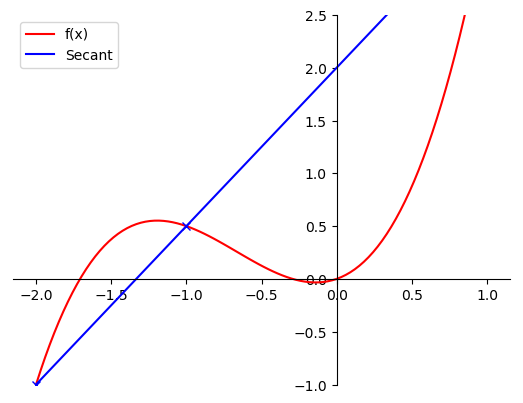

In [1]:
# import required libraries
import numpy as np
from matplotlib import pyplot as plt

#to ignore warnings (in this file warnings related to plots)
import warnings
warnings.filterwarnings("ignore")

#define f(x)
def f(x):
   return x**3 + 2*x**2 + x/2

#create plot
x = np.linspace(-2, 1, 100)
plt.plot(x, f(x), color='red') #f(x)
plt.plot(x,1.5*x+2, color='blue') #secant line
plt.legend(['f(x)','Secant'])
plt.plot(-2, -1, marker='x', c= 'b') #x_1
plt.plot(-1, 0.5, marker='x', c='b') #x_2

#aesthetics: move y axis to origin, remove borders
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['left'].set_position(('data',0))
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)

#show
plt.ylim(-1,2.5)
plt.show()

A secant line through two points $(x_1,y_1)$ and $(x_2,y_2)$ is $y-f(x_1) = \frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1)$ where $\frac{f(x_2)-f(x_1)}{x_2-x_1}$ is the slope $m$. Keep in mind that the secant will eventually help us identify the root of the function. So our task moves from finding the root of function f(x) to finding the root of the secant. Per definition, our secant evaluates to $y = 0$ at the root. So we substitute $y = 0$ into the secant formula and rearrange it to find the x value of the (secant) root. <br>
$ y-f(x_1) = \frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1) $ <br>
$ -f(x_1) = \frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1) $ | $y=0$ <br>
$ -f(x_1)\frac{x_2-x_1}{f(x_2)-f(x_1)} = (x-x_1) $ | multiply bu $1/m$ <br>
$ x = x_1-f(x_1)\frac{x_2-x_1}{f(x_2)-s(x_1)} $ <br>

For our example above, the root of the function is at $x = -2-(-1)\frac{1}{1.5} = -2+\frac{2}{3} = -\frac{4}{3}$.

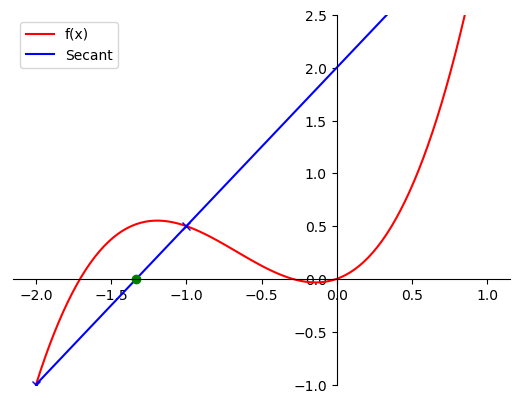

In [2]:
#create plot
x = np.linspace(-2,1,100)
plt.plot(x, f(x), color = 'red') #f(x)
plt.plot(x, 1.5*x+2, color = 'blue') #secant line
plt.legend(['f(x)', 'Secant'])
plt.plot(-2, -1, marker='x', c='b') #x_1
plt.plot(-1, 0.5, marker='x', c='b') #_2
plt.plot(-4/3, 0, marker='o', c= 'g') #root of secant

#aesthetics:move y axist to origin, remove borders
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['left'].set_position(('data',0))
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)
plt.ylim(-1,2.5)

#show
plt.show()

The root of the secant is not close to the root of f(x) yet. But we use it to build a new secant line through the two points at $x_1$ (same as before) and $x_2 = x = -4/3$ (new based on root found in previous iteration). Once more, we find the root of the secant: <br>
$ x = x_1-f(x_1)\frac{x_2-x_1}{f(x_2)-f(x_1)} $ <br>
$ x = -2-(-1)\frac{\frac{-4}{3}-(-2)}{\frac{14}{27}-(-1)} $ | $f(x_2) = \frac{14}{27} $ <br>
$ x = -2+\frac{\frac{2}{3}}{\frac{41}{27}} = -\frac{64}{41} $ 

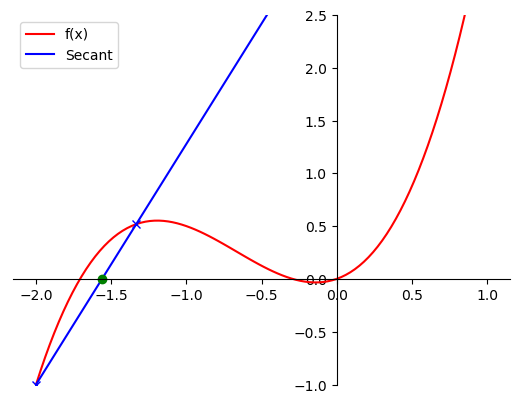

In [3]:
#create plot
x = np.linspace(-2,1,100)
plt.plot(x, f(x), color = 'red') #f(x)
plt.plot(x, 41/18*x+32/9, color = 'blue') #secant line
plt.legend(['f(x)', 'Secant'])
plt.plot(-2, -1, marker='x', c='b') #x_1
plt.plot(-4/3, 14/27, marker='x', c='b') #_2
plt.plot(-64/41, 0, marker='o', c= 'g') #root of secant

#aesthetics:move y axist to origin, remove borders
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['left'].set_position(('data',0))
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)
#to ignore warnings (in this file warnings related to plots)

#show
plt.ylim(-1,2.5)
plt.show()

Note how the root of this secant is closer to the root of f(x) than before. We keep redoing this exercise of (1) building the secant throuogh $x_1$ and $x_2$, (2) finding the root x of the secant, (3) replacing $x_2$ with the x value of that root and again (1) building the secant throuogh $x_1$ and $x_2$.... Like this, the root x of the secant will move closer and closer to the root of f(x). We will stop at a certain level of precision $\epsilon$, which is satisfied once $|x-x_2| < \epsilon$. Then Our approximation for the root of f(x) will be x. <br> 
Following, the next few iterations of the secant approach for our example with $\epsilon = 0.01$. We approximate the root of f(x) at $x \approx 1.7058... $

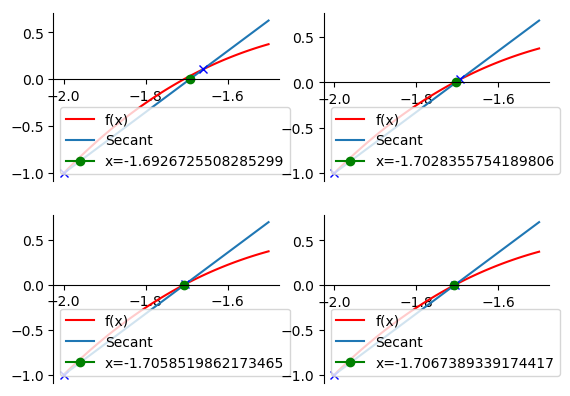

In [4]:
#parameters for secant
def fp(x1,y1,x2,y2):
    return np.array([y1,(y2-y1)/(x2-x1),x1]) #f(x1), slope m, x1

#define secant
def s(x1,y1,x2,y2,x):
    return fp(x1,y1,x2,y2)[1]*(x-fp(x1,y1,x2,y2)[2])+fp(x1,y1,x2,y2)[0]

#algorithm to find root of secant
def secantroot(x1,y1,x2,y2):
    return (x1-s(x1,y1,x2,y2,x1)*(x2-x1)/(s(x1,y1,x2,y2,x2)-s(x1,y1,x2,y2,x1)))

#create plots
x = np.linspace(-2,-1.5,100)
fig, axs = plt.subplots(2,2)

#plot 1
root=-64/41
root=secantroot(-2,-1,root,f(root))
axs[0][0].plot(x,f(x), color = 'red',label ='f(x)')
axs[0][0].plot(x,fp(-2,-1,root,f(root))[1]*(x-fp(-2,-1,root,f(root))[2]) +fp(-2,-1,root,f(root))[0],label = 'Secant')
axs[0][0].plot(-2,-1,marker='x',c='b')
axs[0][0].plot(root,f(root),marker ='x',c='b')
root=secantroot(-2,-1,root,f(root))
axs[0][0].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[0][0].legend()
axs[0][0].spines['bottom'].set_position(('data',0))
axs[0][0].spines['left'].set_position(('outward',0))
axs[0][0].spines['top'].set_visible(False)
axs[0][0].spines['right'].set_visible(False)

#plot 2
axs[0][1].plot(x,f(x), color = 'red',label ='f(x)')
axs[0][1].plot(x,fp(-2,-1,root,f(root))[1]*(x-fp(-2,-1,root,f(root))[2]) +fp(-2,-1,root,f(root))[0],label = 'Secant')
axs[0][1].plot(-2,-1,marker='x',c='b')
axs[0][1].plot(root,f(root),marker ='x',c='b')
root=secantroot(-2,-1,root,f(root))
axs[0][1].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[0][1].legend()
axs[0][1].spines['bottom'].set_position(('data',0))
axs[0][1].spines['left'].set_position(('outward',0))
axs[0][1].spines['top'].set_visible(False)
axs[0][1].spines['right'].set_visible(False)

#plot 3
axs[1][0].plot(x,f(x), color = 'red',label ='f(x)')
axs[1][0].plot(x,fp(-2,-1,root,f(root))[1]*(x-fp(-2,-1,root,f(root))[2]) +fp(-2,-1,root,f(root))[0],label = 'Secant')
axs[1][0].plot(-2,-1,marker='x',c='b')
axs[1][0].plot(root,f(root),marker ='x',c='b')
root=secantroot(-2,-1,root,f(root))
axs[1][0].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[1][0].legend()
axs[1][0].spines['bottom'].set_position(('data',0))
axs[1][0].spines['left'].set_position(('outward',0))
axs[1][0].spines['top'].set_visible(False)
axs[1][0].spines['right'].set_visible(False)

#plot 4
axs[1][1].plot(x,f(x), color = 'red',label ='f(x)')
axs[1][1].plot(x,fp(-2,-1,root,f(root))[1]*(x-fp(-2,-1,root,f(root))[2]) +fp(-2,-1,root,f(root))[0],label = 'Secant')
axs[1][1].plot(-2,-1,marker='x',c='b')
axs[1][1].plot(root,f(root),marker ='x',c='b')
root=secantroot(-2,-1,root,f(root))
axs[1][1].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[1][1].legend()
axs[1][1].spines['bottom'].set_position(('data',0))
axs[1][1].spines['left'].set_position(('outward',0))
axs[1][1].spines['top'].set_visible(False)
axs[1][1].spines['right'].set_visible(False)

#hide plot 4 as change in root is already below epsilon when moving from plot 2 to plot 3
#fig.delaxes(axs[1][1])

### Implementation
We estimate the root of a function f(x) within the interval $[x_1,x_2]$ under the condition that $f(x_1) < 0$ and $f(x_2) > 0$ by finding root of the secant line through $(x_1,f(x_1))$ and $(x_2,f(x_2))$ via $$(1) \ x = x_1-f(x_1)\frac{x_2-x_1}{f(x_2)-f(x_1)} $$
We keep finding the root x by replacing the point $(x_2,f(x_2))$ with the previously found x until $ | (x-x_2) | < \epsilon$ where $\epsilon$ is the desired level of accuracy. The algorithm is implemented in the following code.

_Remeber: We can also estimate the root under the condition that $f(x_1) > 0$ and $f(x_2) < 0$. The only difference is that we must replace the point $(x_1,f(x_1))$ with x until $| (x-x_1) | < \epsilon $. Or alternatively, simply switch the values of $(x_1,f(x_1))$ and $(x_2,f(x_2))$ in (1). The code below handles this case as well._

In [72]:
def RootSecant(fcoefficients, x1, x2, epsilon, maxiterations=1000):
    #Description of function arguments
    ## fcoefficients: An array of coefficients describing the function for which the root shall be found. For example, fcoefficients for f(x)=x^3+2x^2+x/2 would be [1,2,1/2,0]
    ## x1, x2: bounds of the interval containing the root
    ## espilon: desired level of accuracy, exit condition
    ## maxiterations: maximum number of iterations to find the solution, exit condition to avoid endless loop

    #initialize f(x1) and f(x2)
    fx1=0; fx2=0

    #find f(x1) and f(x2)
    i=len(fcoefficients)
    for coefficient in fcoefficients:
        fx1 += coefficient*x1**(i-1)
        fx2 += coefficient*x2**(i-1)
        i -= 1

    #take care of case  f(x_1) > 0 and f(x_2) < 0 by switching (x1,f(x1)) and (x2,f(x2))
    if fx1>0 and fx2<0:
        x2copy=x2
        fx2copy=fx2
        x2=x1
        fx2=fx1
        x1=x2copy
        fx1=fx2copy

    #Error in case f(x_1) and f(x_2) do not have different signs
    if not (fx1 < 0 and fx2 > 0):
        raise ValueError("f(x_1) and f(x_2) do not have different signs.") from None

    #secant method
    j=1;x=epsilon*2 #initialize variables; x is initialized to 2*epsilon, so that the exit condition will not execute during the first iteration of the loop
    while j<=maxiterations: #while loop
        #find root of secant
        x = x1-fx1*(x2-x1)/(fx2-fx1)

        #exit condition
        if abs(x-x2) < epsilon:
            break

        #reassign x and f(x) to x2 and fx2
        x2=x
        #find fx2
        fx2=0
        i=len(fcoefficients)
        for coefficient in fcoefficients:
            fx2 += coefficient*x2**(i-1)
            i -= 1
        j += 1

    #Error in case method did not converge
    if (j==maxiterations+1):
        raise ValueError("Maximum number of iterations reached. Method did not converge.") from None

    return x

For our example above with $f(x) = x^3 + 2x^2 + \frac{x}{2}$, $x_1=-2$, $x_2=-1$ and $\epsilon =0.01$ we get:

In [67]:
RootSecant(np.array([1,2,1/2,0]),-1,-2,0.01,100)

-1.7058519862173465

### Advantages
The main advantage of the secant method is that it is a purely numerical approach to finding roots. So no derivative of the function in question is needed.

### Disadvantages
A successfull run of the secant method requires good initial estimates of $x_1$ and $x_2$. If they are too far away from the root, the approximation might fail to converge. For example:

In [70]:
RootSecant(np.array([1,2,1/2,0]),-100,200,0.01,100)

ValueError: Maximum number of iterations reached. Method did not converge.

If $x_1$ and $x_2$ do not satisfy the condition that $f(x_1)$ and $f(x_2)$ have different signs, the method will fail to deliver a result. This is unhandy for roots that are also local minima or maxima. For $f(x) = x^2$, there is a root that is also a local minima at $x=0$. Since $f(x)$ is always positive, we cannot apply the secant method.

In [73]:
RootSecant(np.array([1,0,0]),-1,2,0.01,100)

ValueError: f(x_1) and f(x_2) do not have different signs.

In [69]:
RootSecant(np.array([1,0,0,0]),-2,-1,0.01,100)

ValueError: Maximum number of iterations reached. Method did not converge.


## Newton-Raphson Method
### Background
A tangent line is a straight line that touches, but does not intersect, a function $f(x)$ at a given point $x$. The slope of the tangent line is the same as the slope of $f(x)$ at the point $x$. The Newton-Rhapson method applies a tangent line to an ititial guess of the root $x_0$ and then iteratively adjusts the tangent line until it ultimately approximates the root of $f(x)$ for a given level of precision.

Let's illustrate this with function $f(x) = x^3 + 2x^2 + \frac{x}{2}$. We can see that there are three roots. We will try to find the first one starting with the tangent at $x_0=-2$:

A tangent line through point $(x_0,f(x_0))$ with slope $f'(x_0)$ is $y-f(x_0)=f'(x_0)(x-x_0)$. We try to estimate the root of f(x) with the root of the tangent. So we set the tangent $y=0$ and rearrange the formula to solve for the x value of the root, which will be the next guess and new $x_0$. <br>
$ y-f(x_0) = f'(x_0)(x-x_0) $ | $y=0$ <br>
$ -f(x_0) = f'(x_0)(x-x_0) $ | divide by $f'(x_0)$ <br>
$ \frac{-f(x_0)}{f'(x_0)} = (x-x_0) $ | move $x_0$ <br> 
$ x = x_0-\frac{f(x_0)}{f'(x_0)} $ <br>

For our function $f(x) = x^3 + 2x^2 + \frac{x}{2}$ we have $f'(x) = 3x^2 + 4x + \frac{1}{2}$. Our first guess for the root of f(x) is at $x_0=-2$. The root of the tangent at that point is $x = x_0-\frac{f(x_0)}{f'(x_0)} = -2+\frac{1}{\frac{5}{4}}=-\frac{16}{9}$

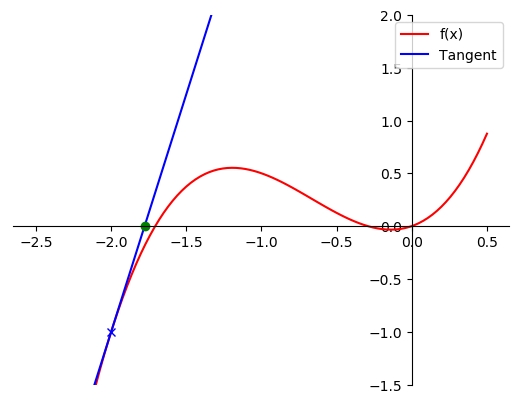

In [5]:
#define f(x)
def f(x):
   return x**3 + 2*x**2 + x/2

#define f'(x)
def fprime(x):
   return 3*x**2 + 4*x + 1/2

#root of tangent
def tangentroot(x_0):
   return x_0 - f(x_0)/fprime(x_0)

#create plot
x = np.linspace(-2.5,0.5,100)
x_0 = -2 #initial guess
plt.plot(x, f(x), color = 'red') #f(x)
plt.plot(x, fprime(x_0)*(x-x_0)+f(x_0), color = 'blue') #tangent line
plt.legend(['f(x)', 'Tangent'])
plt.plot(x_0, f(x_0), marker='x', c='b') #x_1
plt.plot(tangentroot(x_0), 0, marker='o', c= 'g') #root of tangent

#aesthetics:move y axist to origin, remove borders
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['left'].set_position(('data',0))
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)
plt.ylim(-1.5,2)

#show
plt.show()

The root of the tangent is somewhat close to the root of $f(x)$ but not correct yet. So we create a new tangent for $f(x)$ at $x_0=-\frac{16}{9}$ (which is the root of the tangent we just calculated). We find the new root of the tangent at:<br>
$x = x_0-\frac{f(x_0)}{f'(x_0)}$ | $x_0 =-\frac{16}{9}$ <br>
$x = -\frac{16}{9}-\frac{f(-\frac{16}{9})}{f'(-\frac{16}{9})}$ <br>
$x \approx -1.7128$

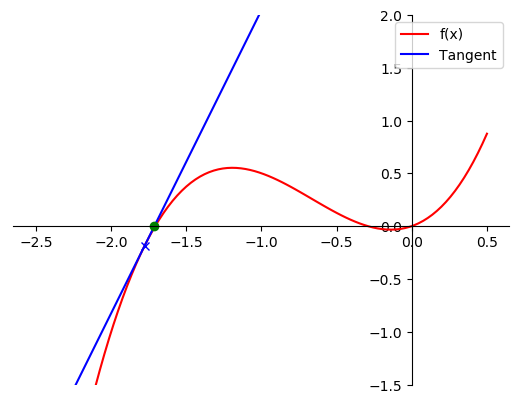

In [6]:
#define f(x)
def f(x):
   return x**3 + 2*x**2 + x/2

#define f'(x)
def fprime(x):
   return 3*x**2 + 4*x + 1/2

#root of tangent
def tangentroot(x_0):
   return x_0 - f(x_0)/fprime(x_0)

#create plot
x = np.linspace(-2.5,0.5,100)
x_0 = -16/9 #initial guess
plt.plot(x, f(x), color = 'red') #f(x)
plt.plot(x, fprime(x_0)*(x-x_0)+f(x_0), color = 'blue') #tangent line
plt.legend(['f(x)', 'Tangent'])
plt.plot(x_0, f(x_0), marker='x', c='b') #x_1
plt.plot(tangentroot(x_0), 0, marker='o', c= 'g') #root of tangent

#aesthetics:move y axist to origin, remove borders
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['left'].set_position(('data',0))
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)
plt.ylim(-1.5,2)

#show
plt.show()

The root of this tangent is pretty close to the root of f(x). We keep repeating this exercise of (1) building the tangent at $x_0$, (2) finding the root x of the tangent, (3) replacing $x_0$ with the x value found in (2) and again (1) building the tangent.... Like this, the root x of the tangent will move closer and closer to the root of f(x). We will stop at a certain level of precision $\epsilon$, which is satisfied once $|x-x_0| < \epsilon$. Our approximation for the root of f(x) will be x. <br>
Following, the next few iterations of the Newton-Raphson approach for our example with $\epsilon = 0.01$. We approximate the root of f(x) at $x \approx 1.7071...$. This is similar to the root that we found via the Secant Method.

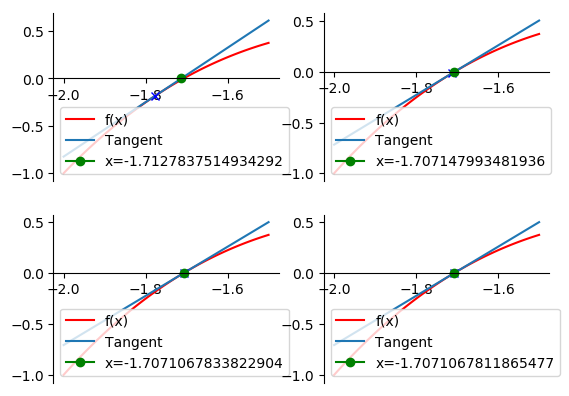

In [7]:
#define f(x)
def f(x):
   return x**3 + 2*x**2 + x/2

#define f'(x)
def fprime(x):
   return 3*x**2 + 4*x + 1/2

#root of tangent
def tangentroot(x_0):
   return x_0 - f(x_0)/fprime(x_0)

#create plots
x = np.linspace(-2,-1.5,100)
fig, axs = plt.subplots(2,2)

#plot 1
root=-16/9
axs[0][0].plot(x,f(x), color = 'red',label ='f(x)')
axs[0][0].plot(x,fprime(root)*(x-root)+f(root),label = 'Tangent')
axs[0][0].plot(root,f(root),marker ='x',c='b')
root=tangentroot(root)
axs[0][0].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[0][0].legend()
axs[0][0].spines['bottom'].set_position(('data',0))
axs[0][0].spines['left'].set_position(('outward',0))
axs[0][0].spines['top'].set_visible(False)
axs[0][0].spines['right'].set_visible(False)

#plot 2
axs[0][1].plot(x,f(x), color = 'red',label ='f(x)')
axs[0][1].plot(x,fprime(root)*(x-root)+f(root),label = 'Tangent')
axs[0][1].plot(root,f(root),marker ='x',c='b')
root=tangentroot(root)
axs[0][1].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[0][1].legend()
axs[0][1].spines['bottom'].set_position(('data',0))
axs[0][1].spines['left'].set_position(('outward',0))
axs[0][1].spines['top'].set_visible(False)
axs[0][1].spines['right'].set_visible(False)

#plot 3
axs[1][0].plot(x,f(x), color = 'red',label ='f(x)')
axs[1][0].plot(x,fprime(root)*(x-root)+f(root),label = 'Tangent')
axs[1][0].plot(root,f(root),marker ='x',c='b')
root=tangentroot(root)
axs[1][0].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[1][0].legend()
axs[1][0].spines['bottom'].set_position(('data',0))
axs[1][0].spines['left'].set_position(('outward',0))
axs[1][0].spines['top'].set_visible(False)
axs[1][0].spines['right'].set_visible(False)

#plot 4
axs[1][1].plot(x,f(x), color = 'red',label ='f(x)')
axs[1][1].plot(x,fprime(root)*(x-root)+f(root),label = 'Tangent')
axs[1][1].plot(root,f(root),marker ='x',c='b')
root=tangentroot(root)
axs[1][1].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[1][1].legend()
axs[1][1].spines['bottom'].set_position(('data',0))
axs[1][1].spines['left'].set_position(('outward',0))
axs[1][1].spines['top'].set_visible(False)
axs[1][1].spines['right'].set_visible(False)

### Implementation
We estimate the root of a function f(x), starting with an initial guess $x_0$, by finding root of the tangent line  at $(x_0,f(x_0))$ via $$ (2) \ x = x_0-\frac{f(x_0)}{f'(x_0)}$$
We will find the root by replacing $x_0$ with the previously found x until $|(x-x_0)| < \epsilon$ where $\epsilon$ is the desired level of accuracy. The algorithm is implemented in the following code.

In [8]:
def RootNewtonRhapson(fcoefficients, fprimecoefficients, x_0, epsilon, maxiterations = 1000):
#Description of function arguments
## fcoefficients: An array of coefficients describing the function for which the root shall be found. For example, fcoefficients for f(x)=x^3+2x^2+x/2 would be [1,2,1/2,0].
## fprimecoefficients: An array of coefficients describing the first derivative of the function for which the root shall be found. For example, fprimecoefficients for f(x)=x^3+2x^2+x/2 would be [3,4,1/2].
## x_0: initial guess of the root
## epsilon: desired level of accuracy
## maxiterations: maximum number of iterations to find the solution, exit condition to avoid endless loop

    #define f(x) and f'(x)
    def f(x,coefficients):
        
        #initialize fx and i
        fx = 0
        i = len(coefficients)

        #calculate fx
        for coefficient in coefficients:
            fx += coefficient*x**(i-1)
            i -= 1
        return fx
    
    #Newton-Raphson
    j=1; #initialize variables
    while j <= maxiterations:
        
        #find root of tangent
        x = x_0 - f(x_0,fcoefficients)/f(x_0,fprimecoefficients)
        
        #exit condition
        if abs(x-x_0)<=epsilon:
            break
        
        #reassign x to x_0
        x_0 = x
        j += 1
        

    #Error in case method did not converge
    if(j==maxiterations+1):
        raise ValueError("Maximum number of iterations reached. Method did not converge.") from None
        #Error in case method did not converge

    return x

For our example above with $f(x) = x^3 + 2x^2 + \frac{x}{2}$, $f'(x) = 3x^2 + 4x + \frac{1}{2}$, $x_0=-2$, and $\epsilon =0.01$ we get:

In [37]:
RootNewtonRhapson(np.array([1,2,1/2,0]),np.array([3,4,1/2]),-2,0.01)

-1.707147993481936

### Advantages
The main advantage of the Newton-Raphson method is that it is more efficient and usually converges faster than the secant and biscection methods (to be discussed in "Application" below).

### Disadvantages
A successfull run of the Newton-Raphson method requires the derivative of the function $f(x)$. So $f(x)$ must be differentiable.

## A Note on the Secant and Newton-Raphson Methods
Comparing the central formulas of the Secant method
$$(1) \ x = x_1-f(x_1)\frac{x_2-x_1}{f(x_2)-f(x_1)} = x_1-f(x_1)\frac{1}{m} $$
and Newton-Raphson method
$$(2) \ x = x_0-\frac{f(x_0)}{f'(x_0)} = x_0-f(x_0)\frac{1}{f'(x_0)} = x_0-f(x_0) \frac{1}{m}$$
we notice that both methods are almost equivalent. The only difference is the way in which the slope of the secant/ tangent is calculated. In the Secant method the slope is calculated numerically from two points. In the Newton-Raphson method the slope is calculated from the derivative of the function. So the Secant method is actually a numerical (finite-difference) approximation of the Newton-Raphson method. So it is not surprising that the analytical Newton-Raphson method is more efficient and faster than the numerical Secant method (as fewer and more precise calculations are used).

## Bisection Method (TBD)
### Background

## Application (TBD)